# K均值算法（K-means）聚类

## 【关键词】K个种子，均值

## 一、K-means算法原理

### 聚类的概念：一种无监督的学习，事先不知道类别，自动将相似的对象归到同一个簇中。

K-Means算法是一种聚类分析（cluster analysis）的算法，其主要是来计算数据聚集的算法，主要通过不断地取离种子点最近均值的算法。

K-Means算法主要解决的问题如下图所示。我们可以看到，在图的左边有一些点，我们用肉眼可以看出来有四个点群，但是我们怎么通过计算机程序找出这几个点群来呢？于是就出现了我们的K-Means算法

![](./img2/1.gif)

这个算法其实很简单，如下图所示：

![](./img2/2.jpg)

从上图中，我们可以看到，A，B，C，D，E是五个在图中点。而灰色的点是我们的种子点，也就是我们用来找点群的点。有两个种子点，所以K=2。

然后，K-Means的算法如下：

1. 随机在图中取K（这里K=2）个种子点。
2. 然后对图中的所有点求到这K个种子点的距离，假如点Pi离种子点Si最近，那么Pi属于Si点群。（上图中，我们可以看到A，B属于上面的种子点，C，D，E属于下面中部的种子点）
3. 接下来，我们要移动种子点到属于他的“点群”的中心。（见图上的第三步）
4. 然后重复第2）和第3）步，直到，种子点没有移动（我们可以看到图中的第四步上面的种子点聚合了A，B，C，下面的种子点聚合了D，E）。

这个算法很简单，重点说一下“求点群中心的算法”：欧氏距离（Euclidean Distance）：差的平方和的平方根

![](./img2/3.gif)


### K-Means主要最重大的缺陷——都和初始值有关：

K是事先给定的，这个K值的选定是非常难以估计的。很多时候，事先并不知道给定的数据集应该分成多少个类别才最合适。（ISODATA算法通过类的自动合并和分裂，得到较为合理的类型数目K）

K-Means算法需要用初始随机种子点来搞，这个随机种子点太重要，不同的随机种子点会有得到完全不同的结果。（K-Means++算法可以用来解决这个问题，其可以有效地选择初始点）

### 总结：K-Means算法步骤：

1. 从数据中选择k个对象作为初始聚类中心;
2. 计算每个聚类对象到聚类中心的距离来划分；
3. 再次计算每个聚类中心
4. 计算标准测度函数，直到达到最大迭代次数，则停止，否则，继续操作。
5. 确定最优的聚类中心

### K-Means算法应用

看到这里，你会说，K-Means算法看来很简单，而且好像就是在玩坐标点，没什么真实用处。而且，这个算法缺陷很多，还不如人工呢。是的，前面的例子只是玩二维坐标点，的确没什么意思。但是你想一下下面的几个问题：

1）如果不是二维的，是多维的，如5维的，那么，就只能用计算机来计算了。

2）二维坐标点的X，Y 坐标，其实是一种向量，是一种数学抽象。现实世界中很多属性是可以抽象成向量的，比如，我们的年龄，我们的喜好，我们的商品，等等，能抽象成向量的目的就是可以让计算机知道某两个属性间的距离。如：我们认为，18岁的人离24岁的人的距离要比离12岁的距离要近，鞋子这个商品离衣服这个商品的距离要比电脑要近，等等。

## 二、实战

重要参数：
- n_clusters：聚类的个数

重要属性：
- cluster_centers_ : [n_clusters, n_features]的数组，表示聚类中心点的坐标
- labels_ : 每个样本点的标签


In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

### 1、聚类实例

导包，使用make_blobs生成随机点cluster_std

In [4]:
from sklearn.datasets import make_blobs

In [5]:
from sklearn.cluster import KMeans

In [17]:
# n_samples=100, n_features=2, centers=3
X_train,y_train = make_blobs(n_samples=100, n_features=2, centers=3)

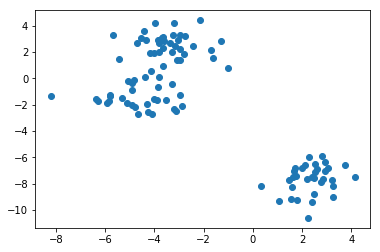

In [18]:
plt.scatter(X_train[:,0],X_train[:,1])

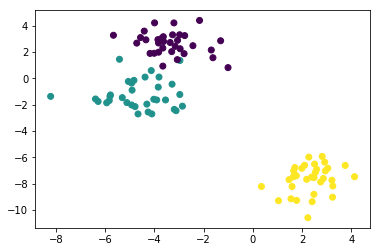

In [19]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

建立模型,训练数据，并进行数据预测，使用相同数据

In [21]:
kmeans = KMeans(n_clusters=3)  # 获取模型

In [22]:
kmeans.fit(X_train)  # 这里不需要给他答案 只把要分类的数据给他 即可

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
y_ = kmeans.predict(X_train)  # 自己会对结果进行预测

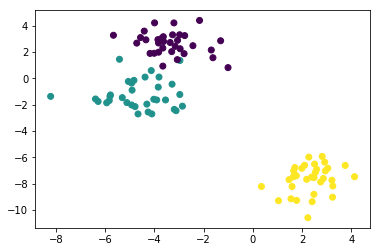

In [28]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

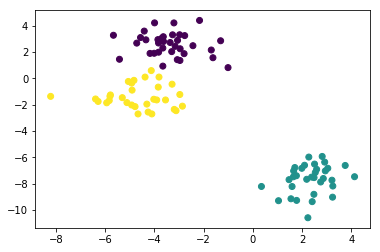

In [29]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_)

绘制图形，显示聚类结果kmeans.cluster_centers

### 实战，三问中国足球几多愁？

导包，3D图像需导包：


from mpl_toolkits.mplot3d import Axes3D 


读取数据

AsiaFootball.csv

列名修改为："国家","2006世界杯","2010世界杯","2007亚洲杯"

In [30]:
from mpl_toolkits.mplot3d import Axes3D

In [35]:
df = pd.read_csv('./data/AsiaFootball.csv',header=None)
df.columns = ["国家","2006世界杯","2010世界杯","2007亚洲杯"]
df

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


使用K-Means进行数据处理，对亚洲球队进行分组，分三组

In [38]:
data = df.iloc[:,1:]  # 所有行都要 从1开始 到最后 （如果是取到最后 冒号后面的可以省略）
data

,2006世界杯,2010世界杯,2007亚洲杯
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


In [39]:
kmeans = KMeans(n_clusters=3)

In [40]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
kmeans.predict(data)

array([0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0])

In [43]:
y_ = kmeans.fit_predict(data)  # 训练完之后 直接用训练 数据来预测 相当于 kmeans.fit()+kmeans.predict()

In [44]:
y_

array([0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0])

In [50]:
# y_==0
df[y_==0]
df[y_==1]
df[y_==2]['国家']

3         伊朗
4         沙特
8     乌兹别克斯坦
12        巴林
13        朝鲜
Name: 国家, dtype: object

for循环打印输出分组后的球队，每一组球队打印一行

In [52]:
for i in range(3):
    # print(i)
    s = df[y_==i]['国家']
    for country in s:
        print(country)
    print('\n')

中国
伊拉克
卡塔尔
阿联酋
泰国
越南
阿曼
印尼


日本
韩国


伊朗
沙特
乌兹别克斯坦
巴林
朝鲜




绘制三维立体图形

- ax = plt.subplot(projection  = '3d')  
- ax.scatter3D()

In [53]:
from mpl_toolkits.mplot3d import Axes3D

In [64]:
centers = kmeans.cluster_centers_
centers

array([[50. , 47.5,  7.5],
       [22.5, 12. ,  3.5],
       [34.6, 38.4,  7.6]])

In [81]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #中文显示问题

In [120]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['STXINWEI']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

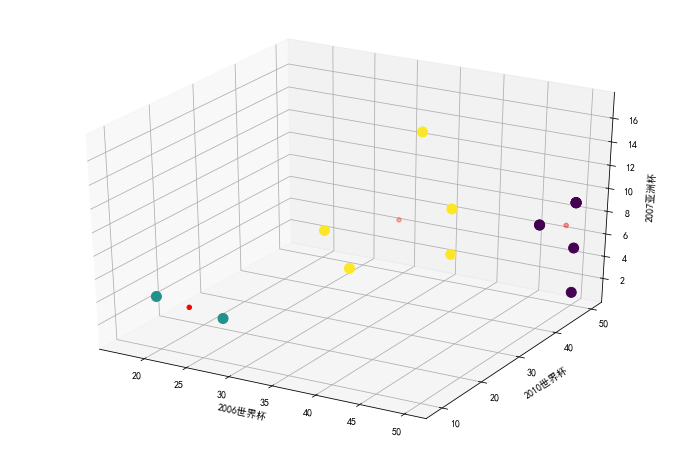

In [82]:
plt.figure(figsize=(12,8))
ax = plt.subplot(projection='3d')
# 
x = df['2006世界杯']
y = df['2010世界杯']
z = df['2007亚洲杯']
ax.scatter3D(x,y,z,c=y_,s=100,alpha=1)
ax.set_xlabel('2006世界杯')
ax.set_ylabel('2010世界杯')
ax.set_zlabel('2007亚洲杯')
ax.scatter3D(centers[:,0],centers[:,1],centers[:,2],c='r')

绘制聚类点

### 2、聚类实践与常见错误

导包，使用make_blobs创建样本点

In [102]:
# n_samples=100, n_features=2, centers=3
X_train,y_train = make_blobs(n_samples=1500, n_features=2, centers=3)

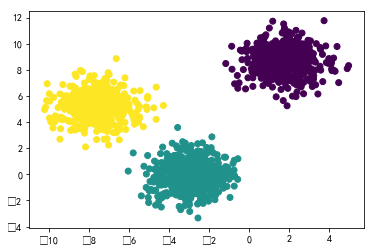

In [103]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

第一种错误，k值不合适，make_blobs默认中心点三个

In [91]:
kmeans = KMeans(n_clusters=4)
y_ = kmeans.fit_predict(X_train)

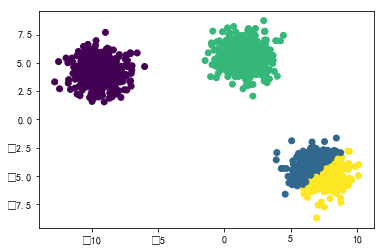

In [92]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_)

第二种错误:标准差cluster_std不相同

In [94]:
# n_samples=100, n_features=2, centers=3, cluster_std=1.0 cluster_std每一堆的标准差
X_train,y_train = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=[0.5,2,10])  # 对3堆数据 分别设置 标准差

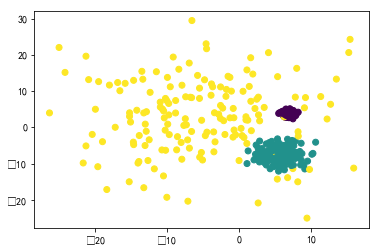

In [96]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

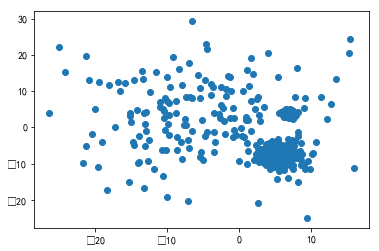

In [97]:
plt.scatter(X_train[:,0],X_train[:,1])

In [98]:
kmeans = KMeans(n_clusters=3)

In [100]:
y_ = kmeans.fit_predict(X_train)

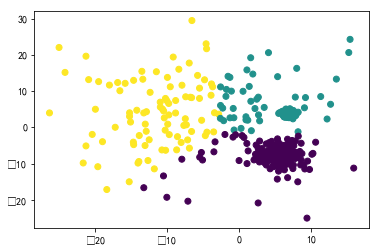

In [101]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_)

第三种错误,数据有偏差  
trans = [[0.6,-0.6],[-0.4,0.8]]  
X2 = np.dot(X,trans)

In [105]:
X_train,y_train

(array([[-7.3578846 ,  5.6956508 ],
        [-2.74740002, -0.67657154],
        [-3.08153856,  0.52315101],
        ...,
        [-2.2930718 , -0.15134425],
        [-3.83979338,  0.30080768],
        [ 0.83911659,  8.44290845]]), array([2, 1, 1, ..., 1, 1, 0]))

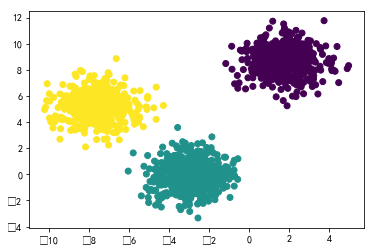

In [108]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [111]:
test = [
    [1,2],
    [3,4],
    [5,6]
]
trans = [
    [0.6,-0.6],
    [-0.4,0.8]
]
np.dot(test,trans)
X_train2 = np.dot(X_train,trans)

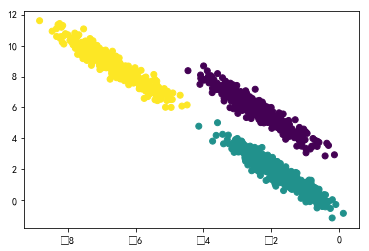

In [113]:
plt.scatter(X_train2[:,0],X_train2[:,1],c=y_train)

In [114]:
kmeans = KMeans(n_clusters=3)

In [116]:
y_ = kmeans.fit_predict(X_train2)

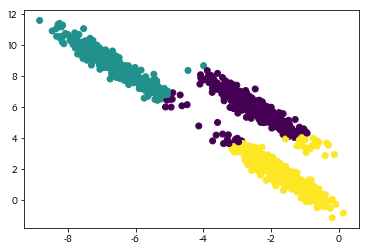

In [121]:
plt.scatter(X_train2[:,0],X_train2[:,1],c=y_)

第四个错误：样本数量不同

In [122]:
X,y = make_blobs(n_samples=1500, n_features=2, centers=3)

In [126]:
y

array([1, 2, 1, ..., 2, 0, 1])

In [133]:
X[y==0]  # 目标值是0的样本 在X中对应的特征值
X[y==1]  

array([[ -2.77843574, -11.36779747],
       [ -1.91921065,  -8.95805663],
       [ -1.57836502,  -8.42145122],
       [ -4.29235939,  -8.54206864],
       [ -2.46007588, -10.85023722],
       [ -2.94162276,  -8.89024979],
       [ -3.21553862,  -8.23770123],
       [ -3.60664838, -10.02166417],
       [ -4.06952496, -10.38289358],
       [ -2.74256144,  -9.25817999],
       [ -2.63845777,  -8.07875635],
       [ -0.53113527,  -8.31663982],
       [ -1.79237235,  -8.70138095],
       [ -2.39488823,  -8.52232971],
       [ -1.16984393, -10.67453301],
       [ -0.13466704, -10.82784229],
       [ -2.84065592,  -9.4313854 ],
       [ -1.84100887,  -8.80658108],
       [ -1.84148538,  -8.22094455],
       [ -1.81339874,  -9.68802114],
       [ -2.22115334,  -9.56612089],
       [ -2.32675781,  -9.56833287],
       [ -1.97255703, -10.52445958],
       [ -2.12810032,  -8.6375662 ],
       [ -3.42898591,  -7.82843037],
       [ -2.10768093,  -9.79461249],
       [ -4.23696204,  -9.95724877],
 

In [134]:
X[y==1].shape

(500, 2)

In [137]:
X1 = X[y==0]  # X1中的这些点 目标值都是0
X2 = X[y==1][:100]
X3 = X[y==2][:10]

In [138]:
X3.shape

(10, 2)

In [140]:
X = np.concatenate((X1,X2,X3))
X

array([[ 8.67496699,  1.27522354],
       [ 8.15975386,  1.90420506],
       [ 9.16684139,  1.32329496],
       ...,
       [ 3.31134201, -4.96479092],
       [ 2.23646827, -4.34238662],
       [ 2.91765616, -4.6065084 ]])

In [142]:
y_train = [0]*500+[1]*100+[2]*10

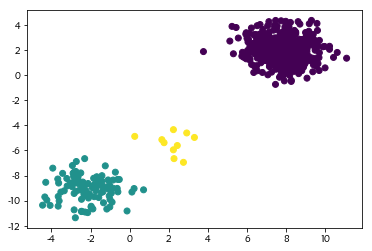

In [143]:
plt.scatter(X[:,0],X[:,1],c=y_train)

In [144]:
kmeans = KMeans(n_clusters=3)

In [146]:
y_ = kmeans.fit_predict(X)

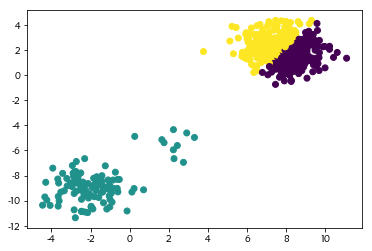

In [149]:
plt.scatter(X[:,0],X[:,1],c=y_)